In [1]:
import numpy as np

In [2]:
d = np.random.randint(1, 11, size=100)

print(d)

[10  7  9  5  3  3 10  9  7  6 10  1  6  3  4  3  9  8  8  5  3  6  3  5
  7  1  4  9  7  1  4  2  6  8  8  5  3  4  9 10  4  6  8  2  6  9  2  6
  8  1 10  6  5  4  1  1  3  3  9  5  3  4  9  7  4  9  2  2 10  7  2  1
  9  9  3  1  7  9  6  2 10  6  1  4  5 10  9  4  3  2  9  7  1  9  7  1
  7  7  4  6]


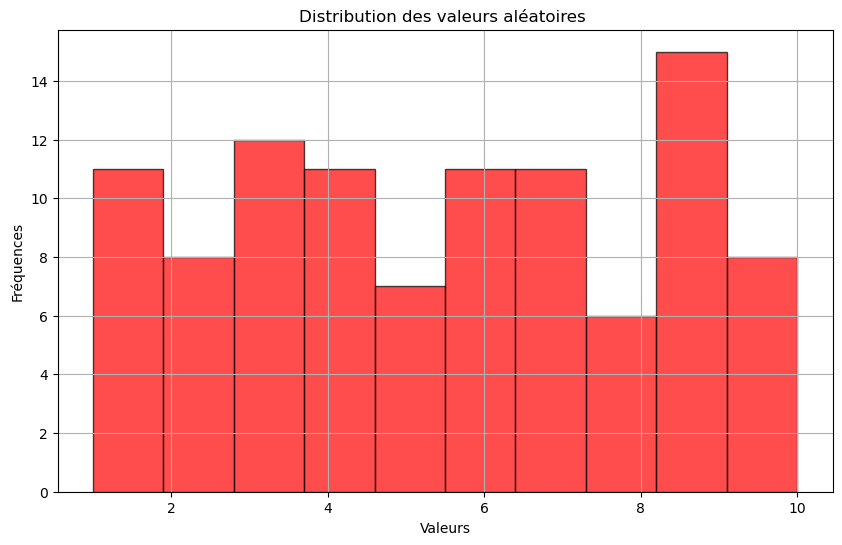

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
plt.hist(d, 
         color='red',               
         edgecolor='black',             
         alpha=0.7)                   

plt.title('Distribution des valeurs aléatoires ')

plt.xlabel('Valeurs')
plt.ylabel('Fréquences')
plt.grid(True)

In [4]:
s=0
for n in d :
    s+=n
moyenne = s/100
print(moyenne)

5.48


In [5]:
d1=d.copy()
for i in range(len(d1)):
    for j in range(i + 1, len(d1)):
        if d1[j] < d1[i]:
            temp = d1[i]
            d1[i] = d1[j]
            d1[j] = temp

if len(d1) %2 ==0 :
    mediane = (d1[len(d1)//2 - 1] + d1[len(d1)//2]) / 2
   

else:
    mediane=d1[len(d1)//2]

print('médiane = ',mediane  )         
            

médiane =  6.0


In [6]:
compteur=0
nbr=0
for n in d:
    for v in d:
        if n==v:
            compteur +=1
    if compteur > nbr :
        nbr=compteur
        mode =n
print('mode =  ',mode)

mode =   6


In [7]:
npmediane=np.median(d)
print(npmediane)
npmode=np.mean(d)
print(npmode)
#le mode est aléatoire mais la moyenne est tjrs proche de (1+10)/2 

6.0
5.48


In [8]:
#variance 
somme =0
for i in d:
    somme +=(i-moyenne) ** 2
variance=somme/100
print(variance)

8.329599999999994


In [9]:
#ecart type
from math import sqrt
ecarttype=sqrt(variance)
print(ecarttype)

2.8861046412075906


In [10]:
#ecart moyen absolu  
somme =0
for i in d:
    somme +=abs(i-moyenne) 
absolu=somme/100
print(absolu)

2.5303999999999998


In [11]:
# étendue max-min 
max=d[0]
min=d[0]
for i in d :
    if d[i]>max:
        max=d[i]
    if d[i]<min:
        min=d[i]
print('étendue = ',max-min)

étendue =  7


In [12]:
#using np 
variance = np.var(d)
print("Variance =", variance)
ecartype = np.std(d)
print("ecartype =", ecartype)
etendue = np.max(d) - np.min(d)
print("Étendue =", etendue)

Variance = 8.3296
ecartype = 2.8861046412075915
Étendue = 9


Text(0, 0.5, 'note')

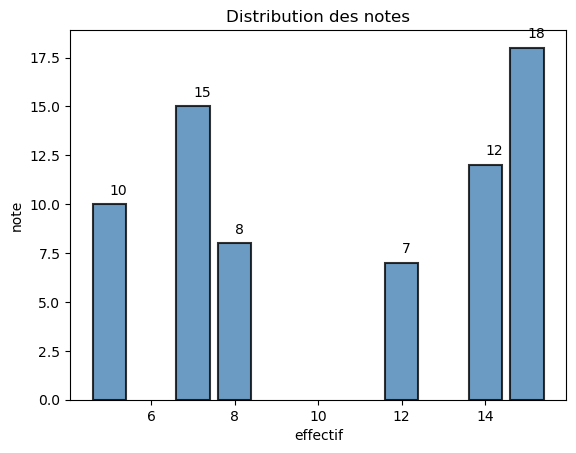

In [13]:
notes = np.array([5, 7, 8, 12, 14, 15])
effectifs = np.array([10, 15, 8, 7, 12, 18])
bars = plt.bar(notes, effectifs, 
               width=0.8,
               color='steelblue', 
               edgecolor='black', 
               alpha=0.8,
               linewidth=1.5)
# Ajouter les valeurs sur chaque barre
for i, (note, effectif) in enumerate(zip(notes, effectifs)):
    plt.text(note, effectif + 0.5, 
             str(effectif) )
plt.title('Distribution des notes')
plt.xlabel('effectif')
plt.ylabel('note')

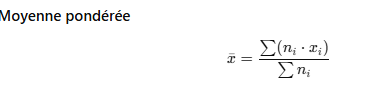
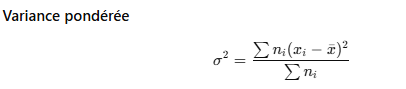
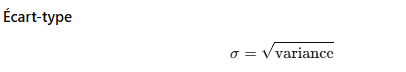

In [14]:
#les criteres de position
#mode = note la plus fréquente 
note_mode = notes[np.argmax(effectifs)]
moyenne = np.sum(notes * effectifs) / np.sum(effectifs)

#de dispersion
etendue = np.max(notes) - np.min(notes)
variance = np.sum(effectifs * (notes - moyenne)**2) / np.sum(effectifs)
ecarttype=np.sqrt(variance)
print ("mode" ,note_mode)
print("moyenne ",moyenne)
print("etendue ",etendue)
print("variance ",variance)
print("ecar ttype " ,ecarttype)

mode 15
moyenne  10.585714285714285
etendue  10
variance  15.185510204081632
ecar ttype  3.8968590177323112


bimodale : il y a deux modes , deux notes trés fréquentes 
mode 1 = 15
mode 2 = 7
->des différences de niveau scolaire

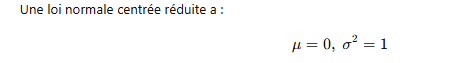

Text(0, 0.5, 'Densité de probabilité')

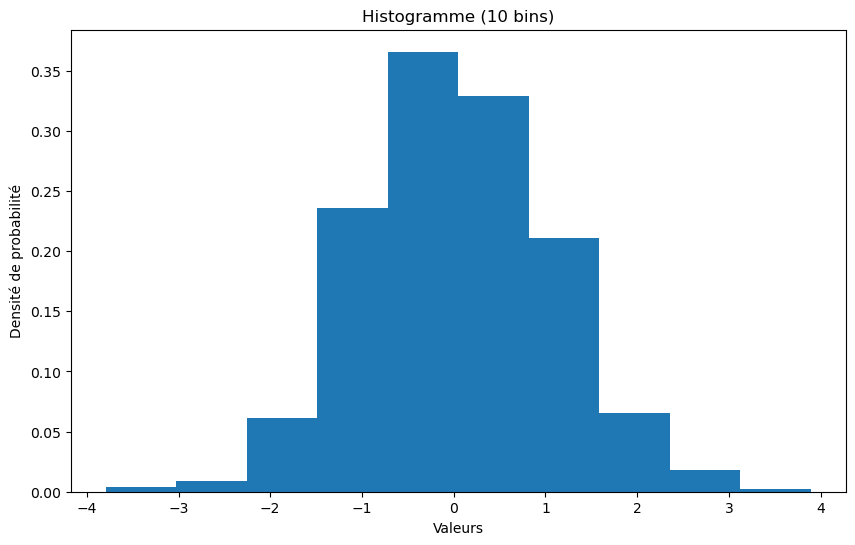

In [15]:
valeurs = np.random.normal(loc=0, scale=1, size=1000)
plt.figure(figsize=(10,6))
plt.hist(valeurs,bins=10,density=True)
plt.title("Histogramme (10 bins)")
plt.xlabel("Valeurs")
plt.ylabel("Densité de probabilité")

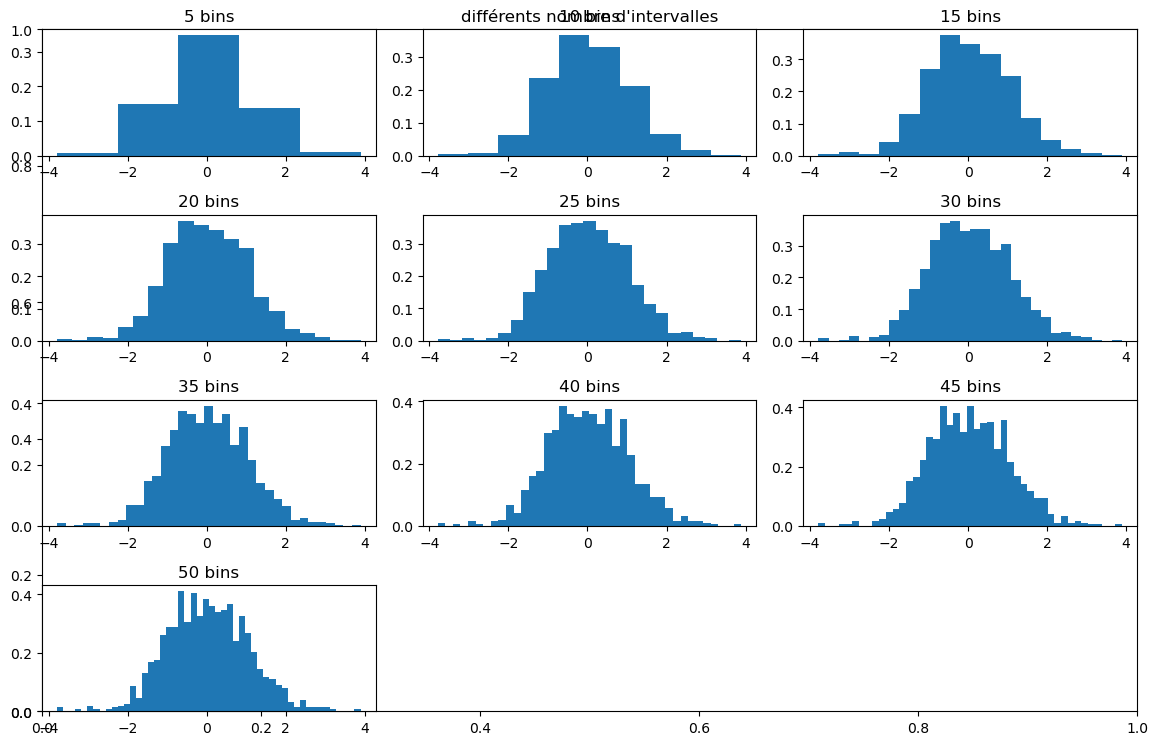

In [16]:
bins =np.arange(5, 51, 5)

plt.figure(figsize=(12, 8))
plt.title("différents nombre d'intervalles")

for i, b in enumerate(bins, 1):
    plt.subplot(4, 3, i)
    plt.hist(valeurs, bins=b, density=True)
    plt.title(f"{b} bins")
plt.tight_layout()



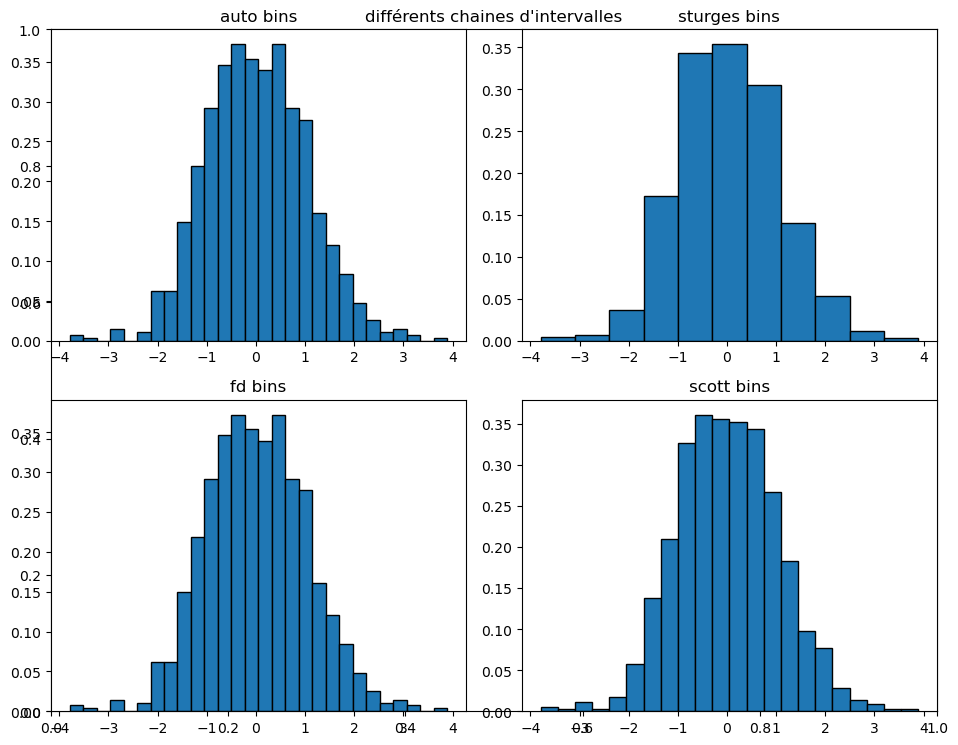

In [17]:
bins =['auto','sturges','fd','scott']

plt.figure(figsize=(10, 8))
plt.title("différents chaines d'intervalles")

for i, b in enumerate(bins, 1):
    plt.subplot(2, 2, i)
    plt.hist(valeurs, bins=b,edgecolor='black', density=True)
    plt.title(f"{b} bins")
plt.tight_layout()



‘fd’ (Freedman Diaconis Estimator)
Robust estimator that takes into account data variability and data size. 

-Auto compare puis choisit la largeur de classe la plus petite entre sturges et fd => combiner les avantages des deux methodes pour avoir un choix plus adapté a la majorité des données 

2.2 Test de normalit´e et comparaison th´eorique

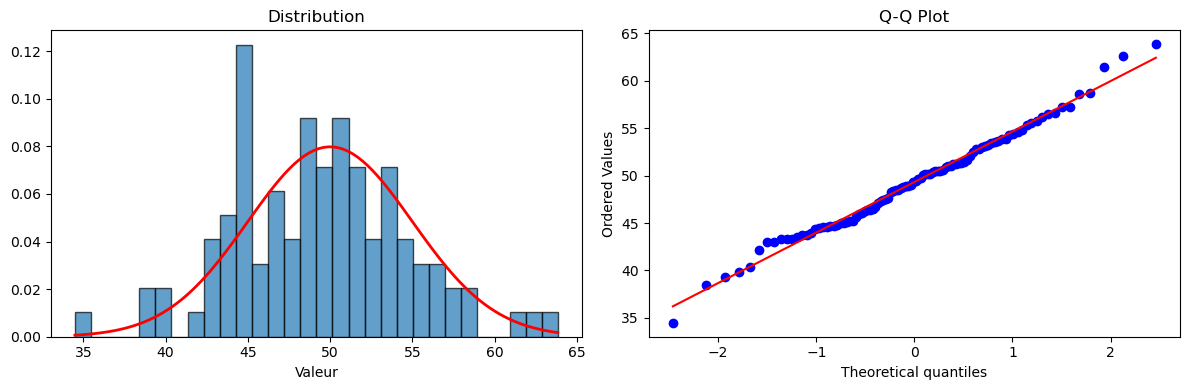

Test de Shapiro-Wilk
Statistique W: 0.9915
P-valeur: 0.7842
Conclusion: Normal (α=0.05)


In [20]:
from scipy import stats

echantillon = np.random.normal(50, 5, 100)
statistic, p_value = stats.shapiro(echantillon)

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Histogramme
ax1.hist(echantillon, bins=30, density=True, alpha=0.7, edgecolor='black')
x = np.linspace(echantillon.min(), echantillon.max(), 100)
ax1.plot(x, stats.norm.pdf(x, 50, 5), 'r-', linewidth=2)
ax1.set_title('Distribution')
ax1.set_xlabel('Valeur')

# Q-Q plot
stats.probplot(echantillon, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Résultats
print(f"Test de Shapiro-Wilk")
print(f"Statistique W: {statistic:.4f}")
print(f"P-valeur: {p_value:.4f}")
print(f"Conclusion: {'Normal' if p_value > 0.05 else 'Non normal'} (α=0.05)")

In [23]:
moyenne = np.mean(echantillon)
ecart_type = np.std(echantillon, ddof=1)
print(f"Empiriques : μ = {moyenne:.4f}, σ = {ecart_type:.4f}")

Empiriques : μ = 49.3192, σ = 5.2699


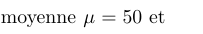
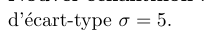

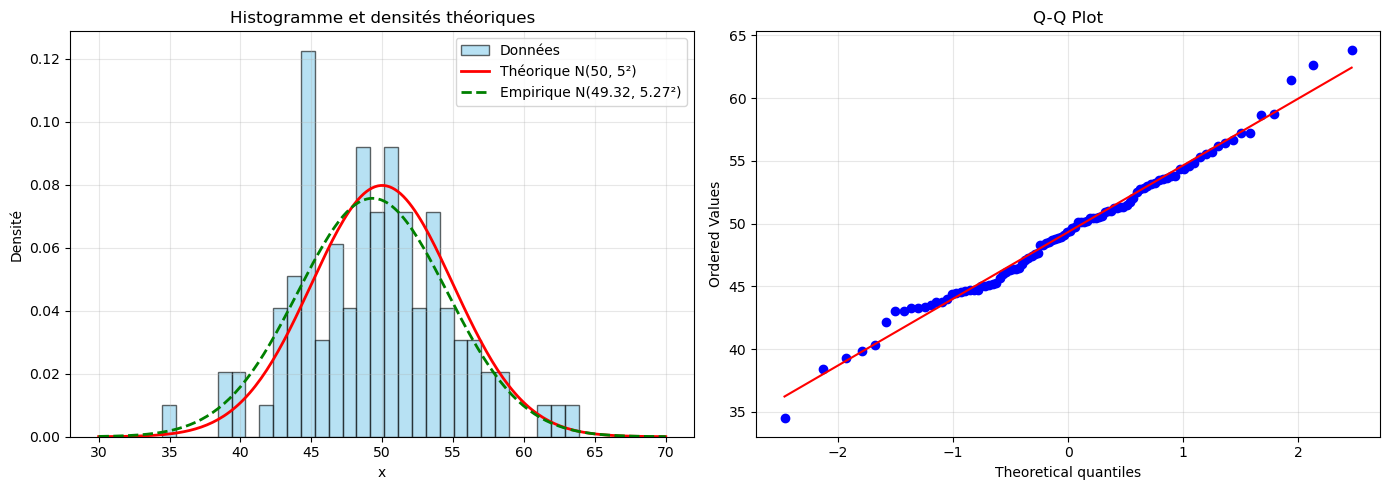

In [26]:
# 4. Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme avec densités théoriques
ax1.hist(echantillon, bins=30, density=True, alpha=0.6, 
         color='skyblue', edgecolor='black', label='Données')

# Courbe théorique avec paramètres théoriques
x = np.linspace(30, 70, 200)
pdf_theorique = stats.norm.pdf(x, 50, 5)
ax1.plot(x, pdf_theorique, 'r-', linewidth=2, 
         label=f'Théorique N({50}, {5}²)')

# Courbe avec paramètres empiriques
pdf_empirique = stats.norm.pdf(x, moyenne, ecart_type)
ax1.plot(x, pdf_empirique, 'g--', linewidth=2, 
         label=f'Empirique N({moyenne:.2f}, {ecart_type:.2f}²)')

ax1.set_xlabel('x')
ax1.set_ylabel('Densité')
ax1.set_title('Histogramme et densités théoriques')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(echantillon, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

2.3 Distribution multimodale et estimation non-param´etrique

In [27]:
np.random.seed(42)
echantillon1 = np.random.normal(20, 5, 300)
echantillon2 = np.random.normal(40, 5, 700)
echantillon = np.concatenate([echantillon1, echantillon2])

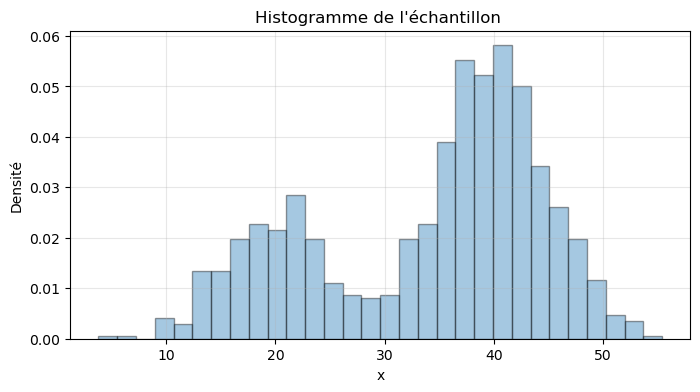

In [29]:
plt.figure(figsize=(8,4))
counts, bins, patches = plt.hist(echantillon, bins=30, density=True, alpha=0.4, edgecolor='k')
plt.title("Histogramme de l'échantillon ")
plt.xlabel("x")
plt.ylabel("Densité")
plt.grid(alpha=0.3)
plt.show()

In [30]:
shapiro_stat, shapiro_p = stats.shapiro(echantillon)
print("Shapiro-Wilk stat = {:.4f}, p-value = {:.4e}".format(shapiro_stat, shapiro_p))
if shapiro_p < 0.05:
    print("=> On rejette l'hypothèse de normalité au niveau 5%")
else:
    print("=> On ne rejette pas l'hypothèse de normalité au niveau 5%")

print("\nPourquoi la distribution n'est pas normale ?")
print("- L'échantillon est une mixture de deux normales éloignées (modes autour de 20 et 40).")
print("- Une seule loi normale unimodale ne peut pas capturer deux pics séparés la forme résultante est bimodale.")


Shapiro-Wilk stat = 0.9286, p-value = 2.0823e-21
=> On rejette l'hypothèse de normalité au niveau 5%

Pourquoi la distribution n'est pas normale ?
- L'échantillon est une mixture de deux normales éloignées (modes autour de 20 et 40).
- Une seule loi normale unimodale ne peut pas capturer deux pics séparés ; la forme résultante est bimodale.


In [31]:
X = echantillon.reshape(-1, 1) 

4. Estimation par noyaux (KDE)

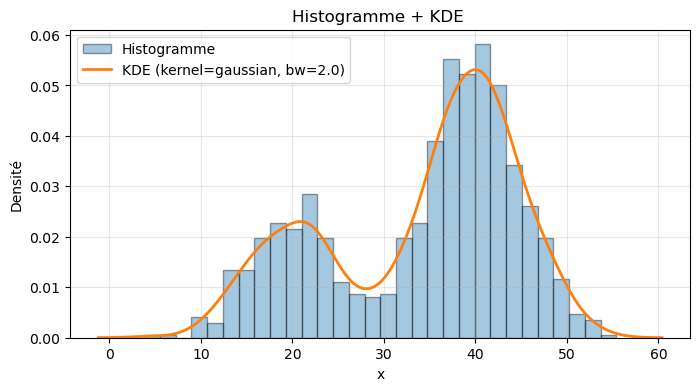

In [34]:
from sklearn.neighbors import KernelDensity

x_grid = np.linspace(echantillon.min() - 5, echantillon.max() + 5, 1000).reshape(-1,1)

bw_ref = 2.0
kde_ref = KernelDensity(bandwidth=bw_ref, kernel='gaussian')
kde_ref.fit(X)

log_dens = kde_ref.score_samples(x_grid)      
dens = np.exp(log_dens)                        

# Affichage overlay histogramme + KDE
plt.figure(figsize=(8,4))
plt.hist(echantillon, bins=30, density=True, alpha=0.4, edgecolor='k', label='Histogramme')
plt.plot(x_grid[:,0], dens, lw=2, label=f'KDE (kernel=gaussian, bw={bw_ref})')
plt.title("Histogramme + KDE ")
plt.xlabel("x")
plt.ylabel("Densité")
plt.legend()
plt.grid(alpha=0.3)
plt.show()